The problem statement for a Credit Card Approval Prediction involves developing a predictive model to determine whether an individual's credit card application will be approved or rejected based on their personal and financial information

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


LOAD THE DATASET

In [ ]:
application_record=pd.read_csv('/content/application_record.csv')
credit_record=pd.read_csv('/content/credit_record.csv')

MERGE THE DATASET

In [ ]:
merged_data=pd.merge(application_record,credit_record,on='ID',how='inner')

Above code merges two dataframe based on common column id retaining only the rows where id value matched in both dataframe

SAVE MERGE DATA TO A NEW CSV FILE





In [ ]:
merged_data.to_csv('merged_data.csv',index=False)

CREATE TARGET COLUMN

In [ ]:
merged_data['TARGET']=merged_data['STATUS'].apply(lambda x: 1 if x in ['1','2','3','4'] else 0)
merged_data.loc[merged_data['STATUS'].isin(['C','X']),'TARGET']=0

In this project we aim to predict whether a credit card application will be approved based on an applicant's demographic and financial data.However the raw data doesnot provide a direct indicator of approval or rejection.To address this we use the 'STATUS' column from the credit history data to create a target column.This target variable categorizes applicants into those likely to be approved or rejected which is crucial for training our predictive model. The above code first applies the lambda function to create the target column and then updates the specific values for C and X

UNDERSTAND THE DATA AND STRUCTURE

In [ ]:
#Display first few rows of dataset to understand their structure

In [ ]:
print('Merged Data:')
merged_data.head()


Merged Data:


ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  ...  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment  ...          -4542           1                1   
1  Rented apartment  ...          -4542           1                1   
2  Rented apartment  ...          -4542           1                1   
3  Rented apartment  ...          -4542           1                1   
4  Rented apartment  ...          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0              NaN             2.0               0   
1           0           0              NaN             2.0              -1   
2           0           0              NaN             2.0              -2   
3           0           0              NaN             2.0              -3   
4           0           0              NaN             2.0              -4   

   STATUS TARGET  
0       C      0  
1       C      0  
2       C      0  
3       C      0  
4       C      0  

[5 rows x 21 columns]

In [ ]:
#Shape of Merged Data Dataset

In [ ]:
print('Shape of Merged Data:')
merged_data.shape

Shape of Merged Data:


(777715, 21)

In [ ]:
#Datatype of each column in Merged Data Dataset

In [ ]:
print('Datatype of each column in Merged Data:')
merged_data.dtypes


Datatype of each column in Merged Data:


ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                  object
TARGET                   int64
dtype: object

In [ ]:
#structure and basic info of dataset

In [ ]:
print('Structure and basic info of Merge Data:')
merged_data.info()

Structure and basic info of Merge Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 

In [ ]:
#Summary statistics of dataset

In [ ]:
print('Summary Statisitcs of Merged Data:')
merged_data.describe()

Summary Statisitcs of Merged Data:


ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  7.777150e+05  777715.000000      7.777150e+05  777715.000000   
mean   5.078743e+06       0.428082      1.885348e+05  -16124.937046   
std    4.180442e+04       0.745755      1.016225e+05    4104.304018   
min    5.008804e+06       0.000000      2.700000e+04  -25152.000000   
25%    5.044568e+06       0.000000      1.215000e+05  -19453.000000   
50%    5.069530e+06       0.000000      1.620000e+05  -15760.000000   
75%    5.115551e+06       1.000000      2.250000e+05  -12716.000000   
max    5.150487e+06      19.000000      1.575000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  777715.000000    777715.0    777715.000000  777715.000000   
mean    57775.825016         1.0         0.231818       0.300965   
std    136471.735391         0.0         0.421993       0.458678   
min    -15713.000000         1.0         0.000000       0.000000   
25%     -3292.000000         1.0         0.000000       0.000000   
50%     -1682.000000         1.0         0.000000       0.000000   
75%      -431.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  MONTHS_BALANCE         TARGET  
count  777715.000000    777715.000000   777715.000000  777715.000000  
mean        0.091675         2.208837      -19.373564       0.012920  
std         0.288567         0.907380       14.082208       0.112929  
min         0.000000         1.000000      -60.000000       0.000000  
25%         0.000000         2.000000      -29.000000       0.000000  
50%         0.000000         2.000000      -17.000000       0.000000  
75%         0.000000         3.000000       -8.000000       0.000000  
max         1.000000        20.000000        0.000000       1.000000



1.   Total Rows


*   There are 777715 records in the dataset


2.   Column Wise Analysis

*   CNT_CHILDREN:The maximum value is 19 which seems high.This indicate a data anomaly or an outlier
*   AMT_INCOME_TOTAL:The dataset include wide range of income from relatively low to high


*   DAYS_BIRTH:The min value is -25152(69 years) and max value is -7489(20.5 years).
years=days/365.25 . Negative value clearly indicate that time is being measured backward from reference date avoiding any misunderstanding
*   DAYS_EMPLOYED: The maximum is 365,243 days(999 years).This could be an error or place holder value


*   FLAG_MOBIL:The mean is 1 suggesting that all or nearly all applicants have mobile phone
*   FLAG_WORK_PHONE:Approximately 23.1%(mean=0.231) of applicants have work phone


*   FLAG_PHONE:Around 30% of applicants have phone
*   CNT_FAM_MEMBERS:The maximum value is 20 which seem unusual high












In [ ]:
#Checking the frequency of categorical features

In [ ]:
print('Frequency of Gender in Merged Data:')
merged_data['CODE_GENDER'].value_counts()

Frequency of Gender in Merged Data:


CODE_GENDER
F    518851
M    258864
Name: count, dtype: int64

The dataset contain more record for females than male

In [ ]:
print('Frequency of FLAG_OWN_CAR in Merge Data:')
merged_data['FLAG_OWN_CAR'].value_counts()

Frequency of FLAG_OWN_CAR in Merge Data:


FLAG_OWN_CAR
N    473355
Y    304360
Name: count, dtype: int64

There are more applicants who dont own a car

In [ ]:
print('Frequency of FLAG_OWN_REALTY in Merged Data:')
merged_data['FLAG_OWN_REALTY'].value_counts()

Frequency of FLAG_OWN_REALTY in Merged Data:


FLAG_OWN_REALTY
Y    512948
N    264767
Name: count, dtype: int64

The majority of applicants own real estate property

In [ ]:
print('Frequency of NAME_INCOME_TYPE in Merged Data:')
merged_data['NAME_INCOME_TYPE'].value_counts()

Frequency of NAME_INCOME_TYPE in Merged Data:


NAME_INCOME_TYPE
Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: count, dtype: int64

The dataset is predominantly composed of working individuals with significant representation from commercial associate and pensioner and small group of state sevant and student

In [ ]:
print('Frquency of OCCUPATION_TYPE in Merged Data:')
merged_data['OCCUPATION_TYPE'].value_counts()

Frquency of OCCUPATION_TYPE in Merged Data:


OCCUPATION_TYPE
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

The dataset shows that labor-intensive jobs like'Laborers' are most common while role such as ITstaff are significantly less represented

In [ ]:
print('Frequency of NAME_EDUCATION_TYPE in Merged Data:')
merged_data['NAME_EDUCATION_TYPE'].value_counts()

Frequency of NAME_EDUCATION_TYPE in Merged Data:


NAME_EDUCATION_TYPE
Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: count, dtype: int64

This dataset have secondary/secondary special as most common

In [ ]:
print('Frequency of NAME_FAMILY_STATUS in Merged Data:')
merged_data['NAME_FAMILY_STATUS'].value_counts()

Frequency of NAME_FAMILY_STATUS in Merged Data:


NAME_FAMILY_STATUS
Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: count, dtype: int64

The majority of applicants are married

In [ ]:
print('Frequency of NAME_HOUSING_TYPE in Merged Data:')
merged_data['NAME_HOUSING_TYPE'].value_counts()

Frequency of NAME_HOUSING_TYPE in Merged Data:


NAME_HOUSING_TYPE
House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64

Majority of applicants live in house/apartment suggesting most have stable housing

In [ ]:
print('Frquency of status in Merged Data:')
merged_data['STATUS'].value_counts()

Frquency of status in Merged Data:


STATUS
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

The distribution of 'status' in credit record dataset indicates that the most records are either marked as c or 0.

*   C:Closed . The credit account has been closed
*   0:No DPD(DAYS PAST DUE) Payements are upto date


*   X:NO LOAN FOR THE MONTH.There was no obligation for payment in the given month,often indicating that account was inactive or there were no dues in that period
*   1: payment is overdue by 1-30 days


*   2:payment is overdue by 31-60 days
*   3:payment is overdue by 61-90 days


*   4:payment is overdue by 91-120days








In [ ]:
print('Frequency of TARGET in Merged Data:')
merged_data['TARGET'].value_counts()

Frequency of TARGET in Merged Data:


TARGET
0    767667
1     10048
Name: count, dtype: int64

In [ ]:
#Convert DAYS_BIRTH and DAYS_EMPLOYED from days to years

In [ ]:
merged_data['AGE_YEARS']=merged_data['DAYS_BIRTH']/-365.25
merged_data['YEARS_EMPLOYED']=merged_data['DAYS_EMPLOYED']/-365.25

In [ ]:
#Drop orginal columns from the dataset

In [ ]:
merged_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)

Since new features AGE_YEARS and YEARS_EMPLOYED are more interpretable and likely more useful for the predictive model we remove above mentioned columns. This will make our dataset cleaner

In [ ]:
#Numerical Feature Frequency

In [ ]:
print('Frequency of AGE_YEARS in Merged Data:')
merged_data['AGE_YEARS'].value_counts()

Frequency of AGE_YEARS in Merged Data:


AGE_YEARS
40.156057    1018
41.451061     928
42.915811     835
42.488706     799
46.529774     799
             ... 
51.972621       1
27.704312       1
53.459274       1
20.503765       1
25.125257       1
Name: count, Length: 7183, dtype: int64

Majority of individuals are concentrated around the age of 40 to 50 years

In [ ]:
print('Frequency of YEARS_EMPLOYED in Merged Data:')
merged_data['YEARS_EMPLOYED'].value_counts()

Frequency of YEARS_EMPLOYED in Merged Data:


YEARS_EMPLOYED
-999.980835    127972
 4.793977        1601
 4.213552        1545
 1.097878        1498
 6.929500        1319
                ...  
 9.018480           1
 10.652977          1
 19.299110          1
 21.259411          1
 7.797399           1
Name: count, Length: 3640, dtype: int64

In [ ]:
merged_data['YEARS_EMPLOYED'].describe()

count    777715.000000
mean       -158.181588
std         373.639248
min        -999.980835
25%           1.180014
50%           4.605065
75%           9.013005
max          43.019849
Name: YEARS_EMPLOYED, dtype: float64

In [ ]:
print('Frequency of AMT_INCOME_TOTAL in Merged Data:')
merged_data['AMT_INCOME_TOTAL'].value_counts()


Frequency of AMT_INCOME_TOTAL in Merged Data:


AMT_INCOME_TOTAL
135000.0    90217
180000.0    68579
157500.0    62686
112500.0    61622
225000.0    61399
            ...  
51750.0         7
89550.0         5
594000.0        4
151200.0        2
134995.5        2
Name: count, Length: 265, dtype: int64

The AMT_INCOME_TOTAL column in the merged data dataset shows that the
most common income are clustered around specific rounded amount(135,000 &180000)

In [ ]:
print('Frequency of CNT_CHILDREN in Merged Data:')
merged_data['CNT_CHILDREN'].value_counts()

Frequency of CNT_CHILDREN in Merged Data:


CNT_CHILDREN
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64

The CNT_CHILDREN columns shows that the vast majority of applicants have no children and few applicants have high number of children. 7 and more are extremely rare.

In [ ]:
print('Frequency of CNT_FAM_MEMBERS in Merged Data:')
merged_data['CNT_FAM_MEMBERS'].value_counts()


Frequency of CNT_FAM_MEMBERS in Merged Data:


CNT_FAM_MEMBERS
2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: count, dtype: int64

The CNT_FAM_MEMBERS reveals that most applicants family sizes of either 2 or 1 followed by 3 and 4 so and so.Larger family size too are there

In [ ]:
import seaborn as sns

In [ ]:
#Categorical Feature Distribution

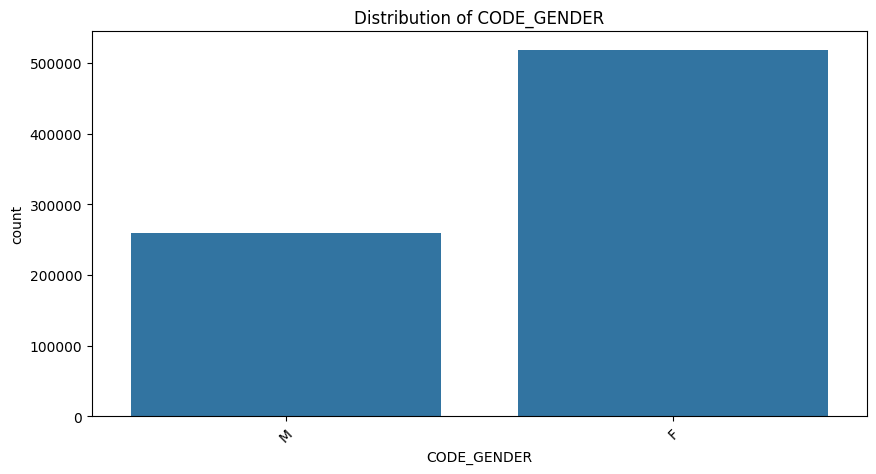

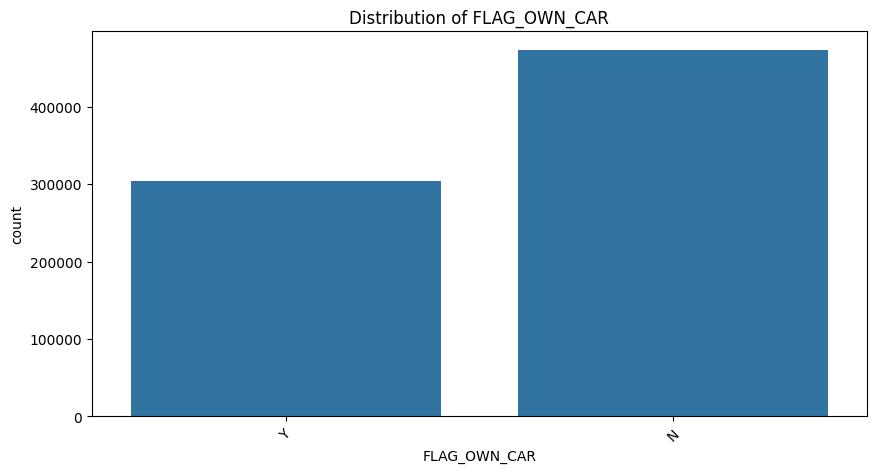

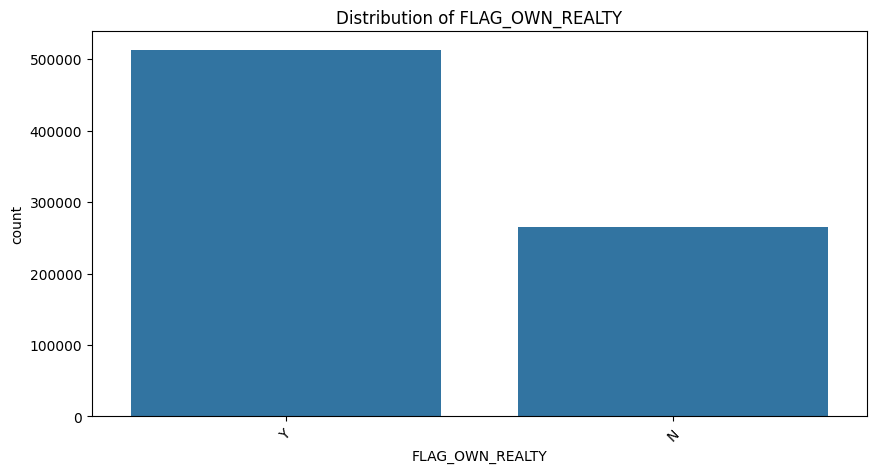

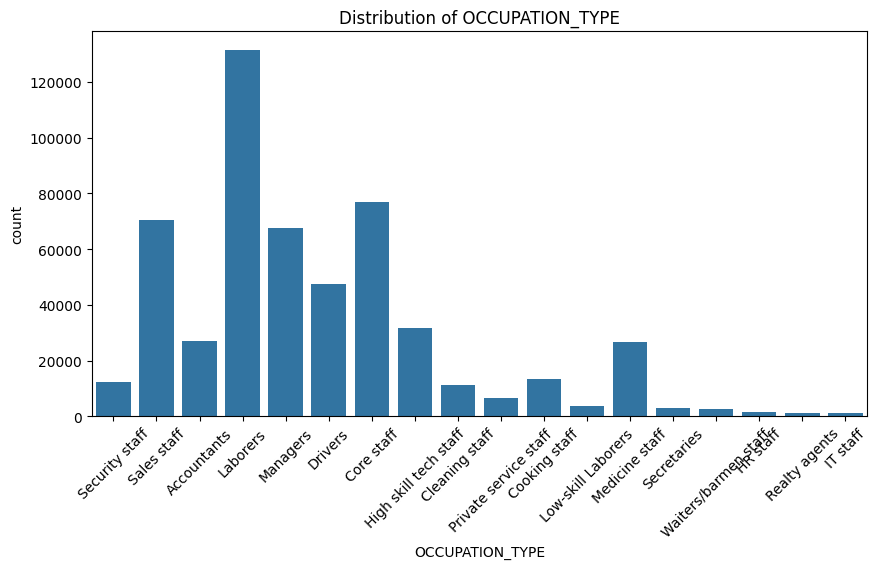

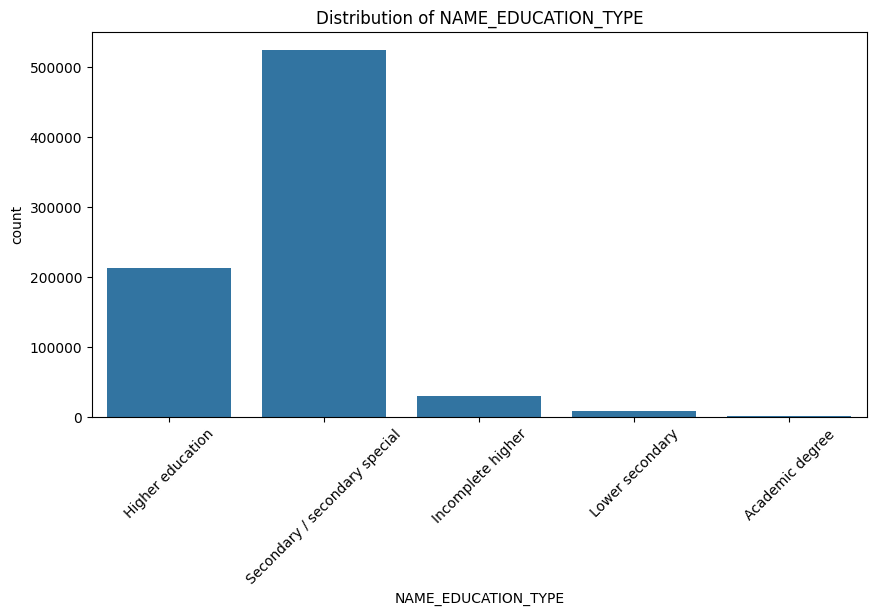

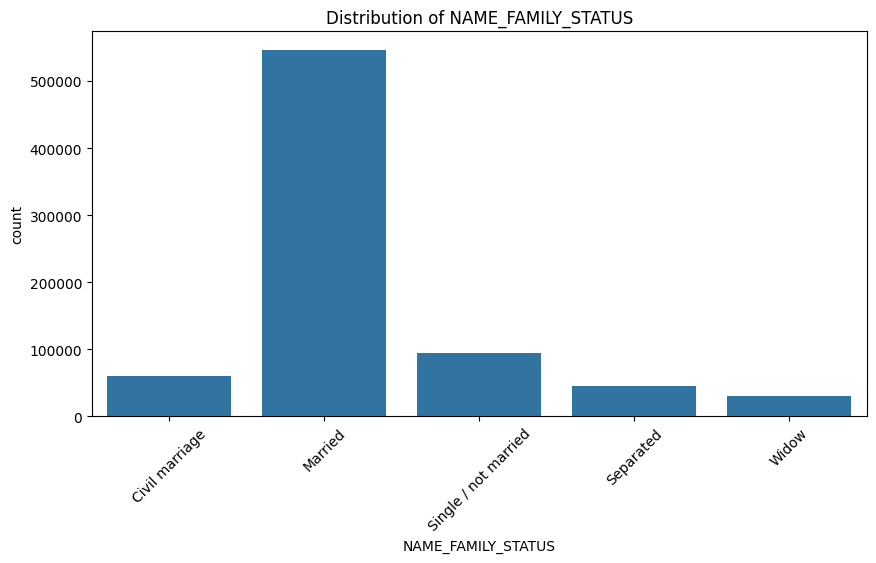

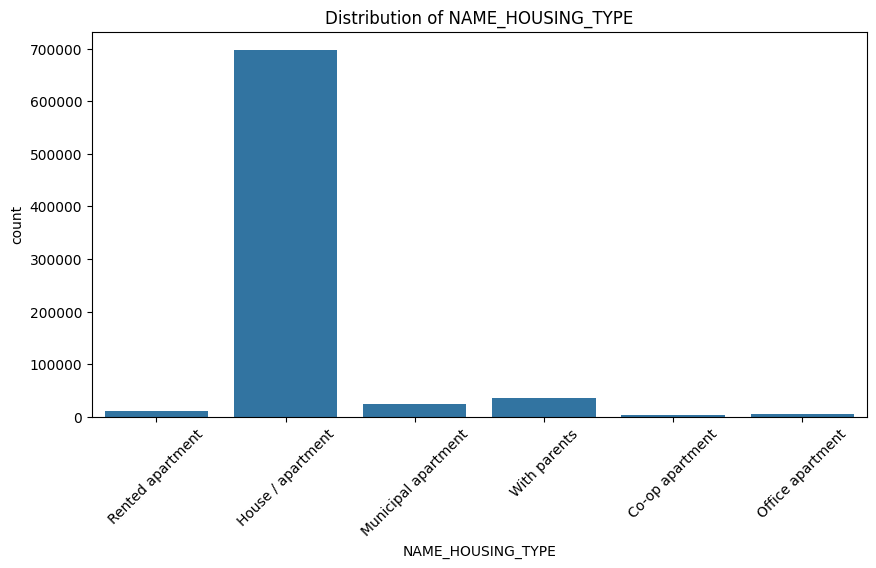

In [ ]:
c=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for i in c:
  plt.figure(figsize=(10,5))
  sns.countplot(x=merged_data[i])
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
#Numerical Feature Distribution

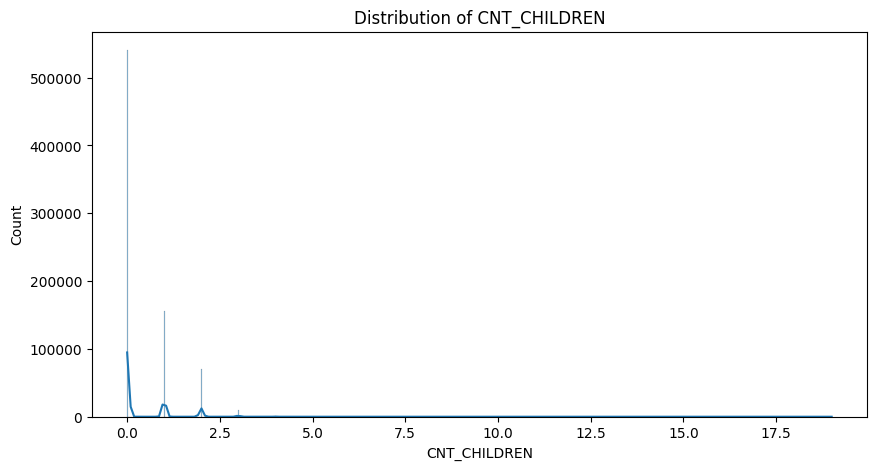

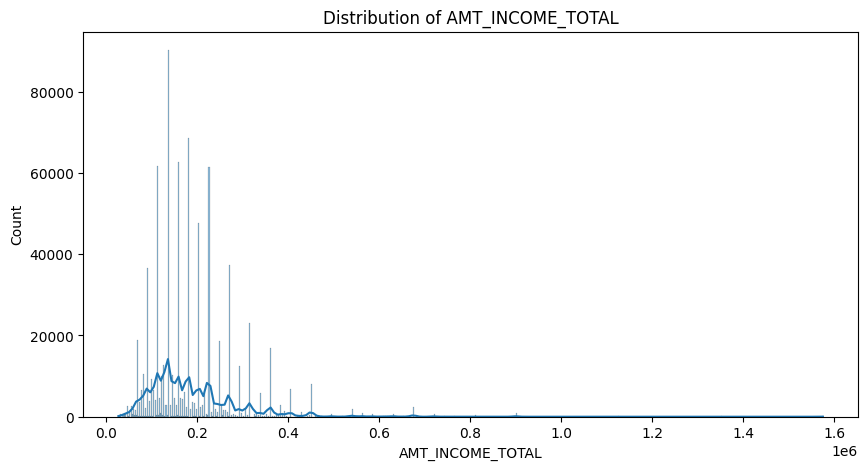

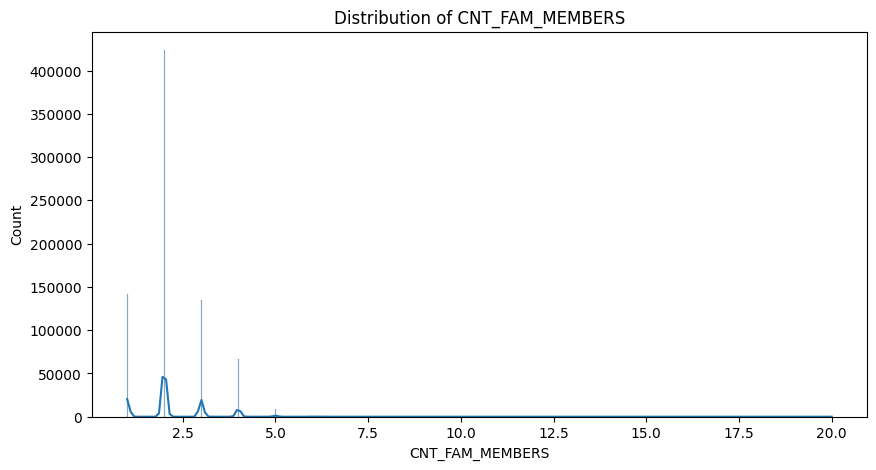

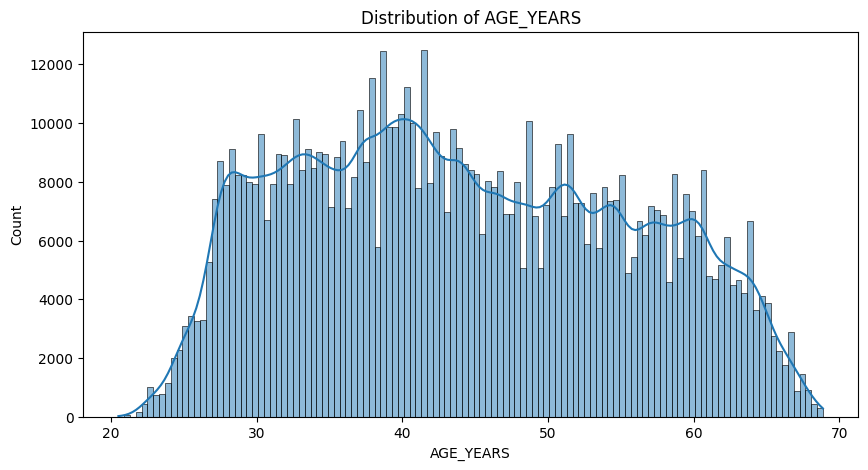

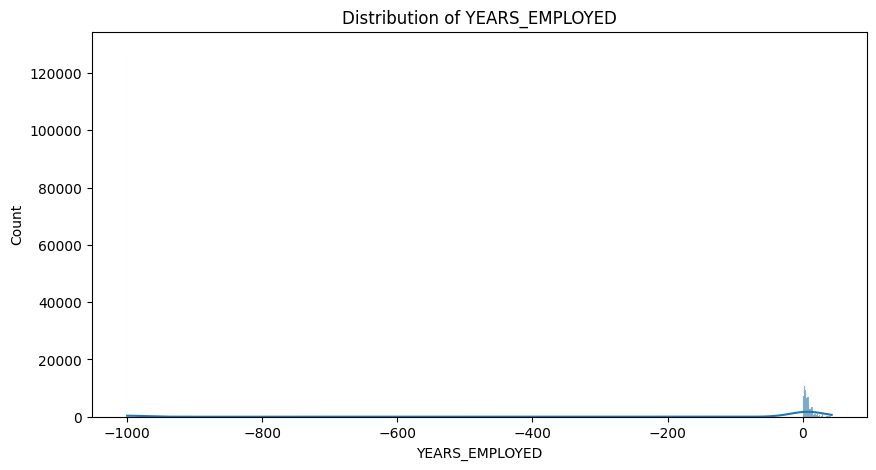

In [ ]:
columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AGE_YEARS','YEARS_EMPLOYED']
for i in columns:
  plt.figure(figsize=(10,5))
  sns.histplot(merged_data[i],kde=True)
  plt.title(f'Distribution of {i}')
  plt.show()

In [ ]:
#Analyse Binary columns

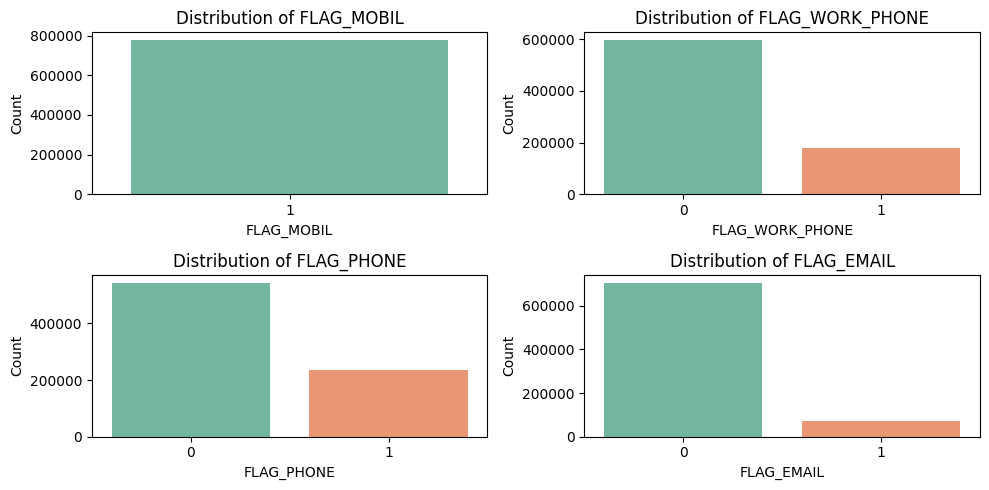

In [ ]:
binary_columns=['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']
plt.figure(figsize=(10,5))
for i,column in enumerate(binary_columns,1):
  plt.subplot(2,2,i)
  sns.countplot(x=column, data=merged_data,hue=column,palette='Set2',legend=False)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
plt.tight_layout()
plt.show()

DATA CLEANING & DATA PREPROCESSING

In [ ]:
#Checking for missing value in dataset

In [ ]:
merged_data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
TARGET                      0
AGE_YEARS                   0
YEARS_EMPLOYED              0
dtype: int64

In [ ]:
#handling missing value by imputation with a placeholder('unknown')

In [ ]:
merged_data['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

It's  straightforward ,preserves the dataset's size and allows model to recognize that the occupation is missing which might carry its own significance

In [ ]:
#Verify the change
merged_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
TARGET                 0
AGE_YEARS              0
YEARS_EMPLOYED         0
dtype: int64

In [ ]:
#Handling unusal age in dataset
merged_data['AGE_YEARS']=merged_data['AGE_YEARS'].round()

In [ ]:
#Verify the change
merged_data['AGE_YEARS'].unique()

array([33., 59., 52., 62., 46., 49., 29., 27., 30., 35., 32., 56., 43.,
       44., 34., 55., 47., 42., 37., 28., 61., 57., 45., 54., 40., 51.,
       39., 48., 24., 21., 36., 26., 50., 63., 58., 41., 60., 31., 38.,
       53., 22., 64., 23., 25., 65., 67., 66., 69., 68.])

In [ ]:
merged_data['YEARS_EMPLOYED'].value_counts()


YEARS_EMPLOYED
-999.980835    127972
 4.793977        1601
 4.213552        1545
 1.097878        1498
 6.929500        1319
                ...  
 9.018480           1
 10.652977          1
 19.299110          1
 21.259411          1
 7.797399           1
Name: count, Length: 3640, dtype: int64

In [ ]:
#Handle unusual values in the column YEARS_EMPLOYED

In [ ]:
#Replace -999.980835 with nan
condition=merged_data['YEARS_EMPLOYED'].apply(lambda x: str(x).startswith('-999'))
merged_data.loc[condition,'YEARS_EMPLOYED']=np.nan

In [ ]:
merged_data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
TARGET                      0
AGE_YEARS                   0
YEARS_EMPLOYED         127972
dtype: int64

In [ ]:
#Median imputation
median_value=merged_data['YEARS_EMPLOYED'].median()
merged_data['YEARS_EMPLOYED'].fillna(median_value,inplace=True)


In [ ]:
#Verify
merged_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
TARGET                 0
AGE_YEARS              0
YEARS_EMPLOYED         0
dtype: int64

In [ ]:
merged_data['YEARS_EMPLOYED']=merged_data['YEARS_EMPLOYED'].round()

In [ ]:
#Handling duplicates of application_record dataset
merged_data.duplicated().sum()

0

In [ ]:
#Outliers

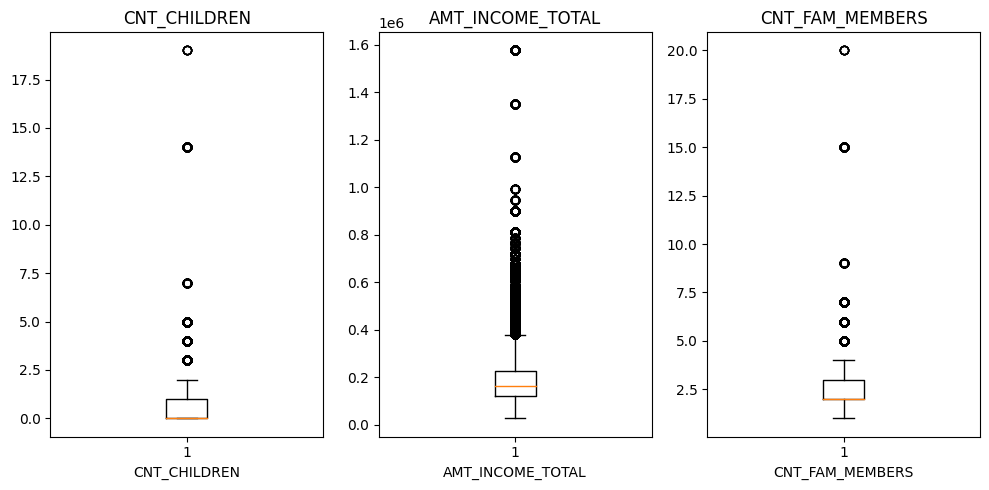

In [ ]:
#Boxplot before handling outliers
columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']
plt.figure(figsize=(10,5))
for i , col in enumerate(columns):
  plt.subplot(1,len(columns),i+1)
  plt.boxplot(merged_data[col])
  plt.title(col)
  plt.xlabel(col)
plt.tight_layout()
plt.show()

Note:In CNT_CHILDREN the majority of data is concentrated at lower end(0-2 children).This compression causes the box to appear very narrow .The lack of distinct line at the bottom reflects the small range between Q1 and Q3

In [ ]:
merged_data['AMT_INCOME_TOTAL'].describe()

count    7.777150e+05
mean     1.885348e+05
std      1.016225e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.620000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:

#Outliers in column AMT_INCOME_TOTAL of merged_data dataset
Q1=merged_data['AMT_INCOME_TOTAL'].quantile(0.25)
Q3=merged_data['AMT_INCOME_TOTAL'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=merged_data[(merged_data['AMT_INCOME_TOTAL']<lower_bound)|(merged_data['AMT_INCOME_TOTAL']>upper_bound)]['AMT_INCOME_TOTAL']
percentage_outliers=len(outliers)/len(merged_data)*100


In [ ]:
lower_bound

-33750.0

In [ ]:
upper_bound

380250.0

In [ ]:
len(outliers)

33987





No:of outliers=33987 rows

In [ ]:
percentage_outliers

4.370109873154047

In [ ]:
#Handling outlier(capping)

because capping allow us to retain data points while reducing impact of extreme value

In [ ]:
#cap the outliers at upper bound(380250)
merged_data['AMT_INCOME_TOTAL']=merged_data['AMT_INCOME_TOTAL'].apply(lambda x:min(x,upper_bound))
merged_data['AMT_INCOME_TOTAL'].describe()

count    777715.000000
mean     183381.285621
std       81920.449447
min       27000.000000
25%      121500.000000
50%      162000.000000
75%      225000.000000
max      380250.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
merged_data['CNT_CHILDREN'].describe()

count    777715.000000
mean          0.428082
std           0.745755
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [ ]:
#Outlier in column CNT_CHILDREN OF merged_data
Q1=merged_data['CNT_CHILDREN'].quantile(0.25)
Q3=merged_data['CNT_CHILDREN'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=merged_data[(merged_data['CNT_CHILDREN']<lower_bound)|(merged_data['CNT_CHILDREN']>upper_bound)]['CNT_CHILDREN']
percentage_outliers=len(outliers)/len(merged_data)*100


In [ ]:
lower_bound

-1.5

In [ ]:
upper_bound

2.5

In [ ]:
len(outliers)

11039

In [ ]:
percentage_outliers

1.4194145670329106

In the analysis of the CNT_CHILDREN,  colummn values above 3 were flagged as outlier using the IQR method.However upto 5 children is realistic.Therefore to ensure that the data remains representative of realworld scenarios while addressing extreme values,we choose to cap CNT_CHILDREN column at 5

In [ ]:
#Cap the outliers at a maximum of 5
merged_data['CNT_CHILDREN']=merged_data['CNT_CHILDREN'].clip(upper=5)


In [ ]:
#verify
merged_data['CNT_CHILDREN'].describe()

count    777715.000000
mean          0.426571
std           0.727340
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: CNT_CHILDREN, dtype: float64

In [ ]:
#Outlier in column CNT_FAM_MEMBERS of Merged_data
Q1=merged_data['CNT_FAM_MEMBERS'].quantile(0.25)
Q3=merged_data['CNT_FAM_MEMBERS'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=merged_data[(merged_data['CNT_FAM_MEMBERS']<lower_bound)|(merged_data['CNT_FAM_MEMBERS']>upper_bound)]['CNT_FAM_MEMBERS']
percentage_outliers=len(outliers)/len(merged_data)*100

In [ ]:
lower_bound

0.5

In [ ]:
upper_bound

4.5

In [ ]:
len(outliers)

10631

In [ ]:
percentage_outliers

1.3669531897931761

In [ ]:
#cap the outlier at maximum of 8
merged_data['CNT_FAM_MEMBERS']=merged_data['CNT_FAM_MEMBERS'].clip(upper=8)

Choose 8 (same reason as in case of CNT_CHILDREN)

In [ ]:
#verify
merged_data['CNT_FAM_MEMBERS'].describe()

count    777715.000000
mean          2.207687
std           0.895457
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           8.000000
Name: CNT_FAM_MEMBERS, dtype: float64

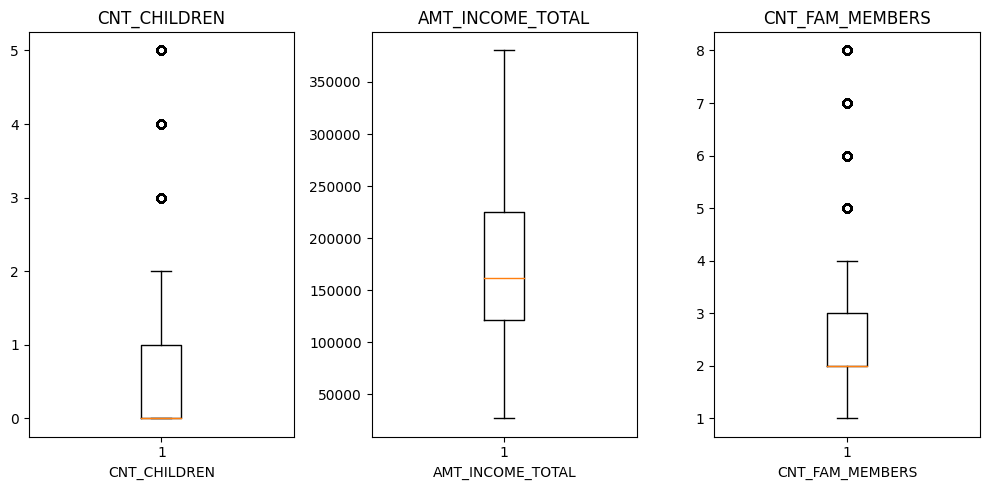

In [ ]:
#Boxplot after handling outliers
columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']
plt.figure(figsize=(10,5))
for i , col in enumerate(columns):
  plt.subplot(1,len(columns),i+1)
  plt.boxplot(merged_data[col])
  plt.title(col)
  plt.xlabel(col)
plt.tight_layout()
plt.show()

In [ ]:
#Dropping unnecessary columns
columns_to_drop=['ID','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','STATUS']
merged_data.drop(columns_to_drop,axis=1,inplace=True)


In [ ]:
merged_data.shape

(777715, 15)

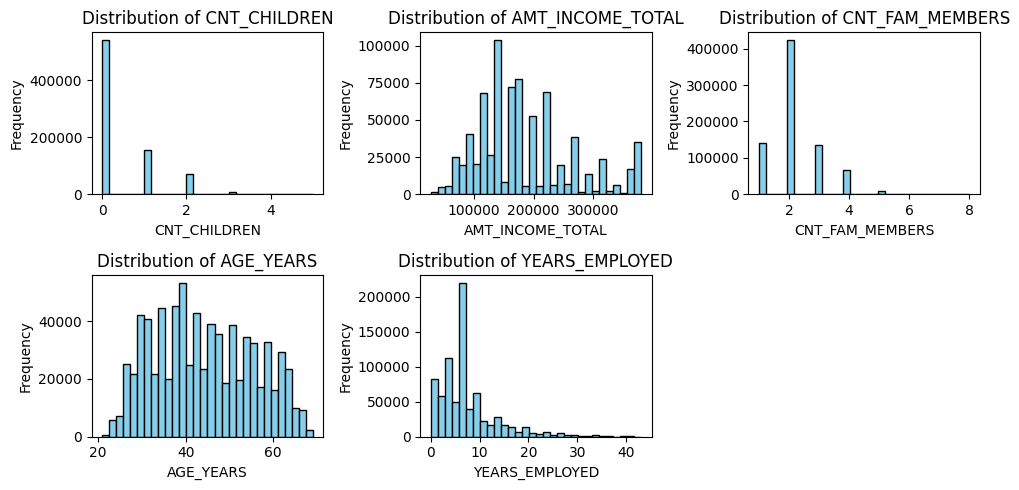

In [ ]:
#Histogram for all numerical features
numerical_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AGE_YEARS','YEARS_EMPLOYED']
plt.figure(figsize=(10,5))
for i,feature in enumerate(numerical_columns,1):
  plt.subplot(2,3,i)
  plt.hist(merged_data[feature],bins=30,edgecolor='black',color='skyblue')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



*   CNT_CHILDREN:Most individuals have no children as indicated by the highest bar at 0
*   AMT_INCOME_TOTAL:The majority of individuals have an annual income between 100,000 and 200,000


*   CNT_FAM_MEMBERS:The majority of applicants belong to families with 2 or 3 members
*   AGE_YEARS:The distribution is relatively even but the peak is around the age of 30-40


*   YEARS_EMPLOYED:Most individuals have fewer than 10 years of employment







In [ ]:
merged_data.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'TARGET', 'AGE_YEARS',
       'YEARS_EMPLOYED'],
      dtype='object')

In [ ]:
merged_data.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            Y               Y             0          380250.0   
1           M            Y               Y             0          380250.0   
2           M            Y               Y             0          380250.0   
3           M            Y               Y             0          380250.0   
4           M            Y               Y             0          380250.0   

  NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE  \
0          Working    Higher education     Civil marriage  Rented apartment   
1          Working    Higher education     Civil marriage  Rented apartment   
2          Working    Higher education     Civil marriage  Rented apartment   
3          Working    Higher education     Civil marriage  Rented apartment   
4          Working    Higher education     Civil marriage  Rented apartment   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  TARGET  AGE_YEARS  \
0         Unknown              2.0               0       0       33.0   
1         Unknown              2.0              -1       0       33.0   
2         Unknown              2.0              -2       0       33.0   
3         Unknown              2.0              -3       0       33.0   
4         Unknown              2.0              -4       0       33.0   

   YEARS_EMPLOYED  
0            12.0  
1            12.0  
2            12.0  
3            12.0  
4            12.0

In [ ]:
#Encoding

In [ ]:
#Encoding Binary Columns
merged_data['CODE_GENDER']=merged_data['CODE_GENDER'].map({'F':0,'M':1})
merged_data['FLAG_OWN_CAR']=merged_data['FLAG_OWN_CAR'].map({'N':0,'Y':1})
merged_data['FLAG_OWN_REALTY']=merged_data['FLAG_OWN_REALTY'].map({'N':0,'Y':1})

In [ ]:
#check resulting dataframe
merged_data[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY
0            1             1                1
1            1             1                1
2            1             1                1
3            1             1                1
4            1             1                1

Binary encoding was used as to efficiently convert binary categorical variables into numerical format(0,1) without adding extra columns.It simplifies the data while preserving all orginal information

In [ ]:
#One hot encoding for NAME_INCOME_TYPE
name_income_type_encoded=pd.get_dummies(merged_data['NAME_INCOME_TYPE'],prefix='NAME_INCOME_TYPE')
merged_data=pd.concat([merged_data,name_income_type_encoded],axis=1)
merged_data.drop('NAME_INCOME_TYPE',axis=1,inplace=True)

turn each category into its own column

In [ ]:
#Label encoding for NAME_EDUCATION_TYPE
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
merged_data['NAME_EDUCATION_TYPE']=label_encoder.fit_transform(merged_data['NAME_EDUCATION_TYPE'])


In [ ]:
#One hot encoding for 'NAME_FAMILY_STATUS
name_family_status_encoded=pd.get_dummies(merged_data['NAME_FAMILY_STATUS'],prefix='NAME_FAMILY_STATUS')
merged_data=pd.concat([merged_data,name_family_status_encoded],axis=1)
merged_data.drop('NAME_FAMILY_STATUS',axis=1,inplace=True)


In [ ]:

#Grouping and one hot encoding for NAME_HOUSING_TYPE
merged_data['NAME_HOUSING_TYPE']=merged_data['NAME_HOUSING_TYPE'].replace({
    'Co-op apartment': 'other',
    'Office apartment': 'other',
'Rented apartment': 'other',
    'Municipal apartment': 'other',
    'With parents': 'other'
})
name_housing_type_encoded=pd.get_dummies(merged_data['NAME_HOUSING_TYPE'],prefix='NAME_HOUSING_TYPE')
merged_data=pd.concat([merged_data,name_housing_type_encoded],axis=1)
merged_data.drop('NAME_HOUSING_TYPE',axis=1,inplace=True)


We grouped the less frequent categories to avoid creating too many sparse columns,making the data more manageable

In [ ]:
#Frequency encoding for 'OCCUPATION_TYPE'
occupation_type_counts=merged_data['OCCUPATION_TYPE'].value_counts()
merged_data['OCCUPATION_TYPE']=merged_data['OCCUPATION_TYPE'].map(occupation_type_counts)


Frequency encoding replaces each category in a column with number of times it appear and it is used here for 'OCCUPATION_TYPE' to retain the importance of each occupation while reducing the number of unique categories

In [ ]:
merged_data.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             1                1             0          380250.0   
1            1             1                1             0          380250.0   
2            1             1                1             0          380250.0   
3            1             1                1             0          380250.0   
4            1             1                1             0          380250.0   

   NAME_EDUCATION_TYPE  OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0                    1           240048              2.0               0   
1                    1           240048              2.0              -1   
2                    1           240048              2.0              -2   
3                    1           240048              2.0              -3   
4                    1           240048              2.0              -4   

   TARGET  ...  NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Student  \
0       0  ...                           False                     False   
1       0  ...                           False                     False   
2       0  ...                           False                     False   
3       0  ...                           False                     False   
4       0  ...                           False                     False   

   NAME_INCOME_TYPE_Working  NAME_FAMILY_STATUS_Civil marriage  \
0                      True                               True   
1                      True                               True   
2                      True                               True   
3                      True                               True   
4                      True                               True   

   NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                    False                     False   
1                                    False                     False   
2                                    False                     False   
3                                    False                     False   
4                                    False                     False   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_other  
0                                False                     True  
1                                False                     True  
2                                False                     True  
3                                False                     True  
4                                False                     True  

[5 rows x 24 columns]

In [ ]:
merged_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
240048    240048
131572    131572
77112      77112
70362      70362
67738      67738
47678      47678
31768      31768
27223      27223
26691      26691
13416      13416
12400      12400
11399      11399
6714        6714
3623        3623
3149        3149
2557        2557
1686        1686
1319        1319
1260        1260
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
#Define the feature set X and the target variable
x=merged_data.drop('TARGET',axis=1)
y=merged_data['TARGET']

In [ ]:
#list of categorical features(including encoded columns)
encoded_categorical_features=[
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE_Working',
    'NAME_INCOME_TYPE_Commercial associate',
    'NAME_INCOME_TYPE_State servant',
    'NAME_INCOME_TYPE_Pensioner',
    'NAME_INCOME_TYPE_Unemployed',
    'NAME_INCOME_TYPE_Student',
    'NAME_FAMILY_STATUS_Married',
    'NAME_FAMILY_STATUS_Single / not married',
    'NAME_FAMILY_STATUS_Civil marriage',
    'NAME_FAMILY_STATUS_Widow',
    'NAME_FAMILY_STATUS_Separated',
    'NAME_HOUSING_TYPE_House / apartment',
    'NAME_HOUSING_TYPE_other',
    'OCCUPATION_TYPE'
]

In [ ]:
#numerical features
numerical_features=x.columns.difference(encoded_categorical_features)

In [ ]:
#split the data into training and test set(80 % train , 20 % test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

stratify=y ensures class distribution in y is preserved in both training and test set

In [ ]:
#scale numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[numerical_features]=scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features]=scaler.transform(x_test[numerical_features])

In [ ]:
#get indices of these features in X_train
categorical_feature_indices=[x_train.columns.get_loc(feature) for feature in encoded_categorical_features if feature in x_train.columns]

This code create a list of indices where categorical feature column are located in X_train

In [ ]:
#initialize smotenc with the indices of categorical features
from imblearn.over_sampling import SMOTENC
smote_nc=SMOTENC(categorical_features=categorical_feature_indices,random_state=42)

This code create an instance of the SMOTENC class configured to handle the categorical features specified by indices

In [ ]:
#Apply SMOTENC  to the training data
x_train_resampled,y_train_resampled=smote_nc.fit_resample(x_train,y_train)

SMOTENC is applied only to training data to ensure that the model learns from balanced data while test data remain unchanged to evaluate the model's performance on real,imbalanced data

In [ ]:
#display class distribution before and after SMOTENC
print('Class distribution before SMOTENC:')
print(Counter(y_train))
print('Class distribution after SMOTENC:')
print(Counter(y_train_resampled))

Class distribution before SMOTENC:
Counter({0: 614134, 1: 8038})
Class distribution after SMOTENC:
Counter({0: 614134, 1: 614134})


Before applying SMOTENC the training data was highly imbalanced but after applying SMOTENC the classes were balanced

In [ ]:
#Rescale the resampled data(SMOTENC can distort the scaling)
x_train_resampled[numerical_features]=scaler.fit_transform(x_train_resampled[numerical_features])
x_test[numerical_features]=scaler.transform(x_test[numerical_features])

In [ ]:
merged_data.shape

(777715, 24)

In [ ]:
import gc
gc.collect()

0

collecting and disposing of unused or unreferenced objects

Subset Sampling for Hyperparameter Tuning

In [ ]:
#Subset sampling for faster hyper parameter tuning
subset_size=int(0.1*len(x_train_resampled))    #use 10% of the resampled training data
x_train_subset=x_train_resampled.sample(n=subset_size,random_state=42) #sample subset
y_train_subset=y_train_resampled[x_train_subset.index]   #match target value to subset

Samples 10% of resampled training data for faster hyper parameter tuning ensuring alignment between features and targets

I choose RandomForestClassifier due to its robustness and accuracy and combined it with EasyEnsembleClassifier and RUSBoostClassifier to effectively handle class imbalance and improve performance on minority class. EasyEnsembleClassifier balances class distribution by creating multiple balanced subset from an imbalanced dataset .RUSBoostClassifier combines random undersampling with boost to improve classification performance on imbalanced dataset. These models are then aggregated using a stack classifier which liverage their individual strenght to improve overall classification accuracy

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier,RUSBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score
import warnings
warnings.filterwarnings('ignore',category=UserWarning,module='joblib')

In [ ]:
#define hyperparameter grid for RandomForestClassifier
rf_param_dist={
    'n_estimators':[50,100],     #No:of trees in forest
    'max_depth':[None,10],      #Max depth of each tree
    'min_samples_split':[2,5],     #min no:of samples required to split an internal node
    'min_samples_leaf':[1,2]       #min no:of samples that must be present in aleaf node

}

In [ ]:
#Initialize BaseRandomForestClassifier
base_rf=RandomForestClassifier(random_state=42,class_weight='balanced')

In [ ]:
#set up RandomizedSearchCV for hyperparameter tuning
search=RandomizedSearchCV(base_rf,rf_param_dist,n_iter=5,cv=3,n_jobs=-1,random_state=42)

In [ ]:
#fit the RandomizedSearchCV
search.fit(x_train_subset,y_train_subset)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42)

In [ ]:
#get best random forest model
best_rf=search.best_estimator_

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
#define hyperparameter for RandomizedSearchCV for EasyEnsembleClassifier
ensemble_param_dist={
    'n_estimators':[10,20],
    }

In [ ]:
#RandomizedSearchCV for EasyEnsembleClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.ensemble import EasyEnsembleClassifier
ensemble_search=RandomizedSearchCV(estimator=EasyEnsembleClassifier(random_state=42),param_distributions=ensemble_param_dist,n_iter=2,cv=3,scoring='f1',n_jobs=-1)

In [ ]:
ensemble_search.fit(x_train_subset,y_train_subset)

RandomizedSearchCV(cv=3, estimator=EasyEnsembleClassifier(random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'n_estimators': [10, 20]},
                   scoring='f1')

In [ ]:
#get the best EasyEnsembleClassifier Model
best_ensemble=ensemble_search.best_estimator_

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

In [ ]:
#Define parametergrid for RUSBoostClassifier
rus_boost_param_dist={
    'n_estimators':[10,20]
   }

In [ ]:
#RandomizedSearchCV for RUSBoostClassifier
rusboost_search=RandomizedSearchCV(estimator=RUSBoostClassifier(random_state=42),param_distributions=rus_boost_param_dist,n_iter=2,cv=3,scoring='f1',n_jobs=-1)

In [ ]:
rusboost_search.fit(x_train_subset,y_train_subset)

RandomizedSearchCV(cv=3, estimator=RUSBoostClassifier(random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'n_estimators': [10, 20]},
                   scoring='f1')

In [ ]:
#get best RUSBoostClassifier model
rus_boost=rusboost_search.best_estimator_

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
#cost sensitive learning
from sklearn.utils.class_weight import compute_class_weight
class_weights=compute_class_weight('balanced',classes=np.unique(y_train_subset),y=y_train_subset)
class_weight_dict=dict(enumerate(class_weights))

Compute class weight and class weight are stored in a dict

In [ ]:
#RandomizedSearchCV for Weighted RandomForest
rf_weighted=RandomForestClassifier(class_weight=class_weight_dict,random_state=42)
search_weighted=RandomizedSearchCV(rf_weighted,rf_param_dist,n_iter=5,cv=3,n_jobs=-1,random_state=42)
search_weighted.fit(x_train_subset,y_train_subset)
best_rf_weighted=search_weighted.best_estimator_

Initializes RandomForestClassifier with computed class weight,perform hyperparameter tuning and best model is stored in best_rf_weighted

In [ ]:
#Initialize model with resampled data

In [ ]:
best_rf_weighted.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(class_weight={0: 1.0012880294779405,
                                     1: 0.9987152800364275},
                       min_samples_leaf=2, random_state=42)

In [ ]:
ensemble_model=EasyEnsembleClassifier(n_estimators=10,random_state=42)
ensemble_model.fit(x_train_resampled,y_train_resampled)

EasyEnsembleClassifier(random_state=42)

Initialize and trains EasyEnsembleClassifier

In [ ]:
rusboost_model=RUSBoostClassifier(n_estimators=10,random_state=42)
rusboost_model.fit(x_train_resampled,y_train_resampled)

RUSBoostClassifier(n_estimators=10, random_state=42)

Initialize and trains RUSBoostClassifier using best weighted RandomForestClassifier as base estimator

In [ ]:
#stacking ensemble model
base_models=[('rf',best_rf_weighted),('ensemble',ensemble_model),('rusboost',rusboost_model)]

Prepare a list of base model for stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stacked_model=StackingClassifier(estimators=base_models,final_estimator=LogisticRegression(),cv=3)
stacked_model.fit(x_train_resampled,y_train_resampled)

StackingClassifier(cv=3,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight={0: 1.0012880294779405,
                                                                     1: 0.9987152800364275},
                                                       min_samples_leaf=2,
                                                       random_state=42)),
                               ('ensemble',
                                EasyEnsembleClassifier(random_state=42)),
                               ('rusboost',
                                RUSBoostClassifier(n_estimators=10,
                                                   random_state=42))],
                   final_estimator=LogisticRegression())

Initialize and trains a stacking classifier that combines base model using Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,precision_recall_curve,precision_score,recall_score

In [ ]:
#function to evaluate model
def evaluate_model(model,model_name,x_test,y_test,thresholds):
  print(f"Evaluating:{model_name}")
  y_pred_prob=model.predict_proba(x_test)[:,1]
  best_f1=0
  best_threshold=0.5
  best_y_pred=None
  for threshold in thresholds:
    y_pred=np.where(y_pred_prob>=threshold,1,0)
    f1=f1_score(y_test,y_pred,zero_division=0)
    if f1>best_f1:
      best_f1=f1
      best_threshold=threshold
      best_y_pred=y_pred
      print(f"\n Threshold:{threshold}")
      print(f"F1 Score:{f1}")
      print(f"Precision:{precision_score(y_test,y_pred,zero_division=0)}")
      print(f"Recall:{recall_score(y_test,y_pred)}")
      print("Confusion Matrix")
      print(confusion_matrix(y_test,y_pred))
  print("\n Best Threshold:")
  print(f"Threshold:{best_threshold}")
  print(f"F1 Score:{best_f1}")
  print("classification Report:")
  print(classification_report(y_test,best_y_pred,zero_division=0))
  print("AUC:")
  auc_score=roc_auc_score(y_test,y_pred_prob)
  print(auc_score)
  return best_f1,auc_score
thresholds_to_set=[0.2,0.25,0.3,0.35,0.4,0.45,0.5]

In [ ]:
#Evaluate all models
f1_score_rf_weighted, roc_auc_rf_weighted=evaluate_model(best_rf_weighted,"Best Random Forest Weighted",x_test,y_test,thresholds_to_set)

Evaluating:Best Random Forest Weighted

 Threshold:0.2
F1 Score:0.2128929566255472
Precision:0.1330514797314101
Recall:0.5323383084577115
Confusion Matrix
[[146561   6972]
 [   940   1070]]

 Threshold:0.25
F1 Score:0.22432494807292871
Precision:0.14603365384615385
Recall:0.4835820895522388
Confusion Matrix
[[147849   5684]
 [  1038    972]]

 Threshold:0.3
F1 Score:0.23113633432219788
Precision:0.15601601950200245
Recall:0.445771144278607
Confusion Matrix
[[148686   4847]
 [  1114    896]]

 Threshold:0.35
F1 Score:0.23378091872791515
Precision:0.16327739387956564
Recall:0.41144278606965173
Confusion Matrix
[[149295   4238]
 [  1183    827]]

 Threshold:0.4
F1 Score:0.23656608036146523
Precision:0.1750656794841175
Recall:0.3646766169154229
Confusion Matrix
[[150079   3454]
 [  1277    733]]

 Threshold:0.45
F1 Score:0.23658230120265658
Precision:0.18506037629879246
Recall:0.32786069651741295
Confusion Matrix
[[150631   2902]
 [  1351    659]]

 Threshold:0.5
F1 Score:0.236670502493287

The model achieves high accuracy overall but struggles with the minority classs shwoing low precision and recall indicating while it predicts the majority class well it has difficulty identify minority class

In [ ]:
f1_score_ensemble,roc_auc_ensemble=evaluate_model(ensemble_model,"Best EasyEnsemble",x_test,y_test,thresholds_to_set)

Evaluating:Best EasyEnsemble

 Threshold:0.2
F1 Score:0.025686977299880526
Precision:0.013013329122751615
Recall:0.9840796019900497
Confusion Matrix
[[  3513 150020]
 [    32   1978]]

 Threshold:0.25
F1 Score:0.025691467879151084
Precision:0.013016157989228007
Recall:0.981094527363184
Confusion Matrix
[[  4001 149532]
 [    38   1972]]

 Threshold:0.3
F1 Score:0.025704684357743177
Precision:0.013023823906217848
Recall:0.9761194029850746
Confusion Matrix
[[  4848 148685]
 [    48   1962]]

 Threshold:0.4
F1 Score:0.02585351891420546
Precision:0.013102057063439055
Recall:0.9661691542288557
Confusion Matrix
[[  7254 146279]
 [    68   1942]]

 Threshold:0.45
F1 Score:0.029341536821296497
Precision:0.015005736485181694
Recall:0.6572139303482587
Confusion Matrix
[[66821 86712]
 [  689  1321]]

 Threshold:0.5
F1 Score:0.031930333817126275
Precision:0.016519082388276114
Recall:0.4761194029850746
Confusion Matrix
[[96557 56976]
 [ 1053   957]]

 Best Threshold:
Threshold:0.5
F1 Score:0.031930

Here it has high recall for minority class but sufferes from exterme low precision resulting in many false positive anf low f1 score indicating poor overall performance.

In [ ]:
f1_score_rusboost,roc_auc_rusboost=evaluate_model(rusboost_model,"Best RusBoost",x_test,y_test,thresholds_to_set)

Evaluating:Best RusBoost

 Threshold:0.2
F1 Score:0.02551522344861729
Precision:0.012922471599493387
Recall:1.0
Confusion Matrix
[[     0 153533]
 [     0   2010]]

 Threshold:0.45
F1 Score:0.02568664372443348
Precision:0.013013157894736843
Recall:0.9840796019900497
Confusion Matrix
[[  3511 150022]
 [    32   1978]]

 Threshold:0.5
F1 Score:0.031829135100462876
Precision:0.016489141953909436
Recall:0.45671641791044776
Confusion Matrix
[[98778 54755]
 [ 1092   918]]

 Best Threshold:
Threshold:0.5
F1 Score:0.031829135100462876
classification Report:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78    153533
           1       0.02      0.46      0.03      2010

    accuracy                           0.64    155543
   macro avg       0.50      0.55      0.41    155543
weighted avg       0.98      0.64      0.77    155543

AUC:
0.565374316436031


model achieves a low f1 score with high recall but poor precision. means while it detects most minority class instance it misclassifies large number of majority class samples

In [ ]:
f1_score_stacked,roc_auc_stacked=evaluate_model(stacked_model,"StackedModel",x_test,y_test,thresholds_to_set)

Evaluating:StackedModel

 Threshold:0.2
F1 Score:0.2343660355708548
Precision:0.16465135026199113
Recall:0.4064676616915423
Confusion Matrix
[[149388   4145]
 [  1193    817]]

 Threshold:0.25
F1 Score:0.2380436464943507
Precision:0.17277016400808806
Recall:0.3825870646766169
Confusion Matrix
[[149851   3682]
 [  1241    769]]

 Best Threshold:
Threshold:0.25
F1 Score:0.2380436464943507
classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    153533
           1       0.17      0.38      0.24      2010

    accuracy                           0.97    155543
   macro avg       0.58      0.68      0.61    155543
weighted avg       0.98      0.97      0.97    155543

AUC:
0.85241237618775


Best balance between recall and precision especially for minority class compared to other models tested. while some misclassification do occur its overall performance with f1 score of 0.24 and AUC of 0.8524 indicate that it effectively capture the nauances of our data and address class imbalance better than other approach

Feature Importance

In [ ]:
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance

In [ ]:
#compute permuatation importance for stacking model
result=permutation_importance(stacked_model,x_test,y_test,n_repeats=5,random_state=42,scoring='f1')


In [ ]:
#get feature importance and their standard deviations
importance=result.importances_mean
std=result.importances_std
indices=np.argsort(importance)

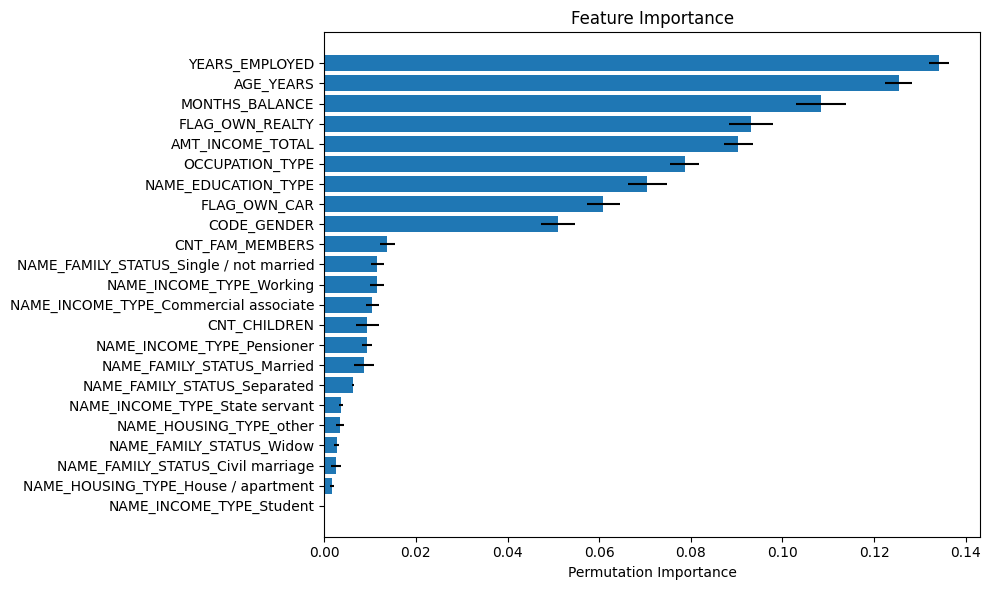

In [ ]:
#plot feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(len(importance)),importance[indices],xerr=std[indices],align='center')
plt.yticks(range(len(importance)),x_test.columns[indices])
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

The top features influencing the credit card approval prediction are YEARS_EMPLOYED,AGE_YEARS and MONTH_BALANCE

In [ ]:
#Summary table of model performance
model_performance=pd.DataFrame({
    'Model':['Random Forest Weighted','EasyEnsemble','RUSBoost','StackedModel'],
    'F1 Score':[f1_score_rf_weighted,f1_score_ensemble,f1_score_rusboost,f1_score_stacked],
    'AUC':[roc_auc_rf_weighted,roc_auc_ensemble,roc_auc_rusboost,roc_auc_stacked]
})
model_performance


Model  F1 Score       AUC
0  Random Forest Weighted  0.236671  0.857290
1            EasyEnsemble  0.031930  0.568465
2                RUSBoost  0.031829  0.565374
3            StackedModel  0.238044  0.852412

While the random forest weighted model has slightly higher AUC(0.857290),the stacked model was choosen because it balances both minority class detection and overall performance better with highest f1 score.This make it more effective for imbalanced data where f1 score is crucial for addressing class imbalance issue